In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt


%matplotlib inline

global embed
embed = hub.KerasLayer(os.getcwd())

2023-09-21 07:30:10.206149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
for x in os.listdir("."):
    print(x)

image_processing.ipynb
.gitignore
.git
static
image_db.db
main.py
requirements.txt
assets
variables
modal.py
db
__pycache__
saved_model.pb
venv


In [5]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [6]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

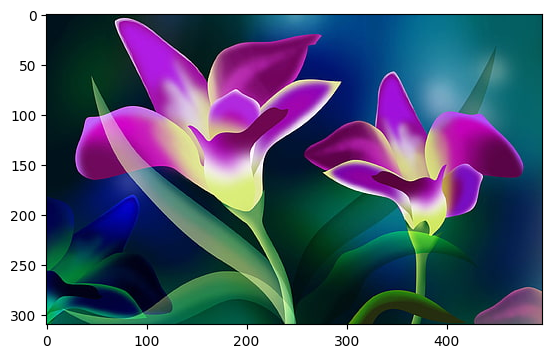

In [7]:
plt.imshow(convertBase64("Image2.jpg"))

In [8]:
helper = TensorVector("Image2.jpg")
vector = helper.process()

In [9]:
len(vector)

1280

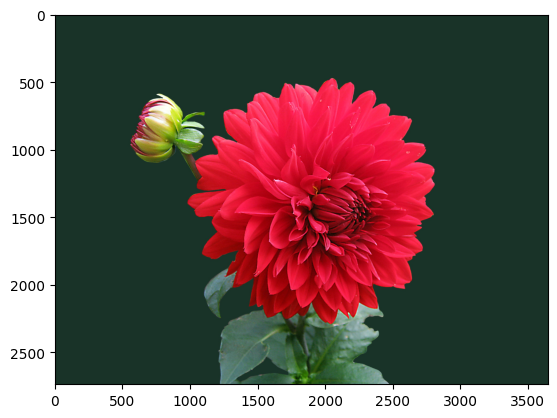

In [10]:
plt.imshow(convertBase64("Image3.jpg"))

In [11]:
helper = TensorVector("Image3.jpg")
vector2 = helper.process()

In [12]:
len(vector2)

1280

In [13]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [14]:
cosineSim(vector, vector2)

0.7132449370014989